## Keras Regression

## The Data

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Data\data tensorflow\kc_house_data.csv')

## EDA

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.shape

(21613, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
# missing values
df_null = round(100*df.isna().sum()/len(df), 2)
df_null

id               0.0
date             0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
dtype: float64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [8]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
plt.style.use(['science','notebook','grid'])

C:\Users\ibrahim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


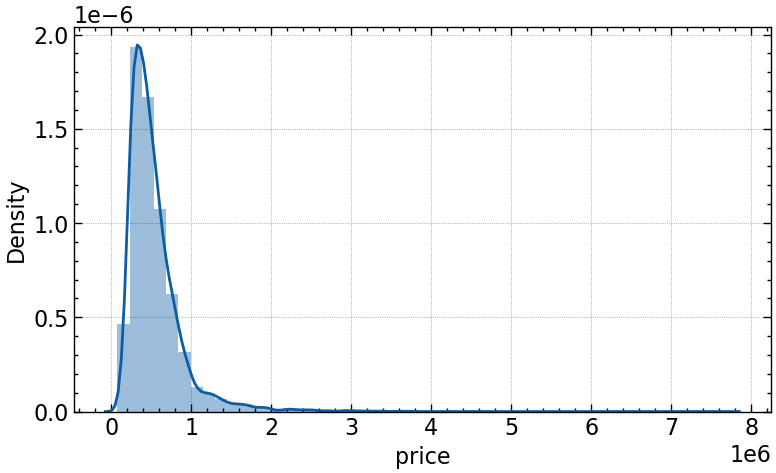

In [10]:
plt.figure(figsize=(9, 5), dpi=100)
sns.distplot(df['price']);

In [11]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

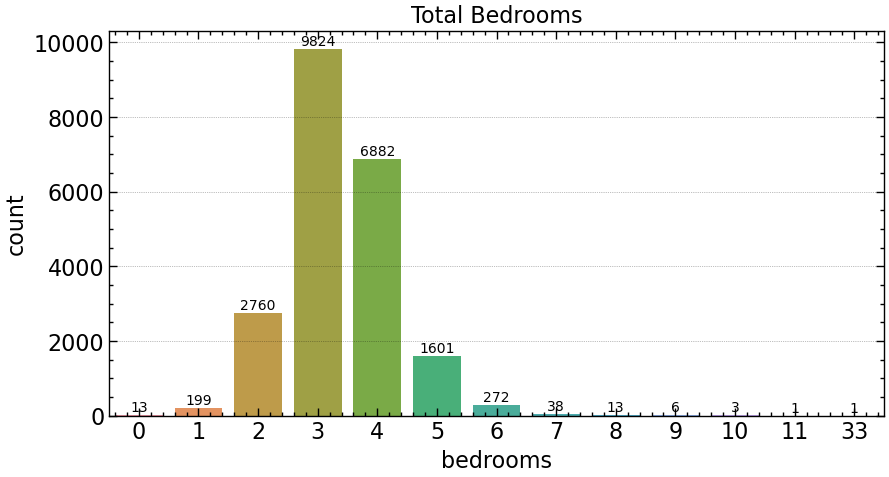

In [12]:
plt.figure(figsize=(10,5), dpi=100)
ax = sns.countplot(x='bedrooms', data =df)

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + p.get_width()/ 2, 
            y = height + 100, 
            s = '{:.0f}'.format(height), 
            ha = 'center')
plt.title('Total Bedrooms')
plt.show()

## Chek correlation

In [13]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

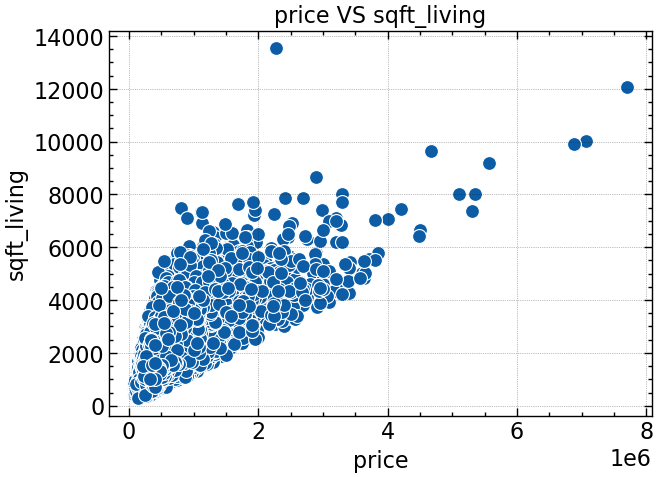

In [14]:
plt.figure(figsize=(7, 5), dpi=100)
sns.scatterplot(x='price', y='sqft_living', data = df, s=100);
plt.title('price VS sqft_living');

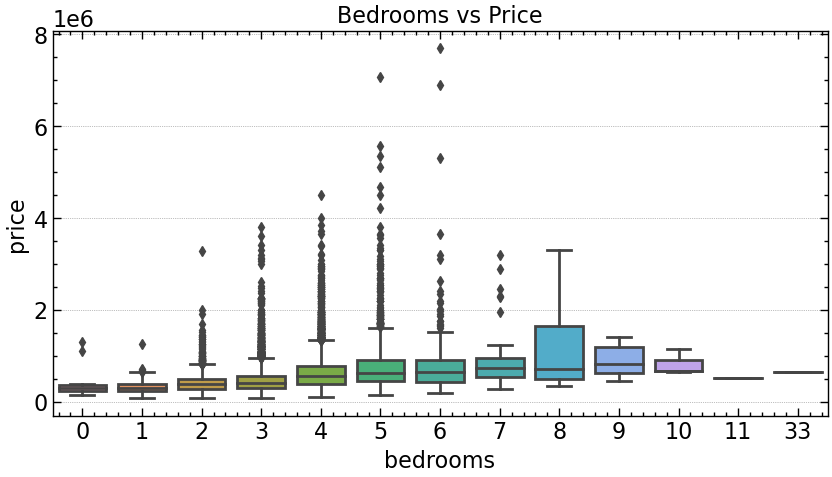

In [15]:
plt.figure(figsize=(10, 5), dpi=100)
sns.boxplot(x='bedrooms', y='price', data=df);
plt.title('Bedrooms vs Price');

## Letak geografis properti

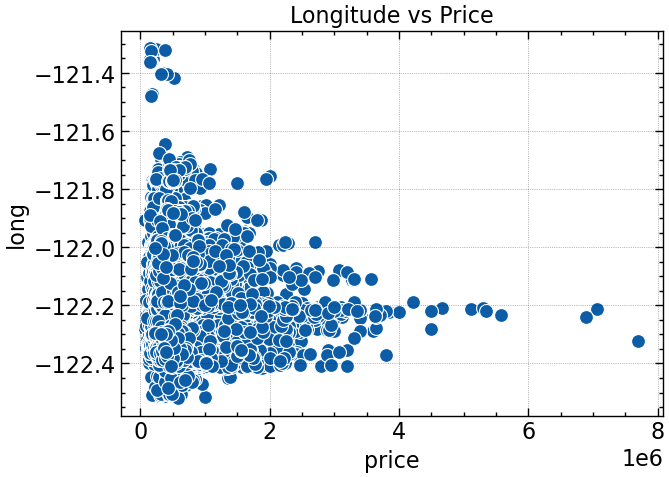

In [16]:
plt.figure(figsize=(7,5), dpi=100)
sns.scatterplot(x='price', y='long', data=df, s=100);
plt.title('Longitude vs Price');

rumah yang mempunya harga tertingi berada di long `-122.2`

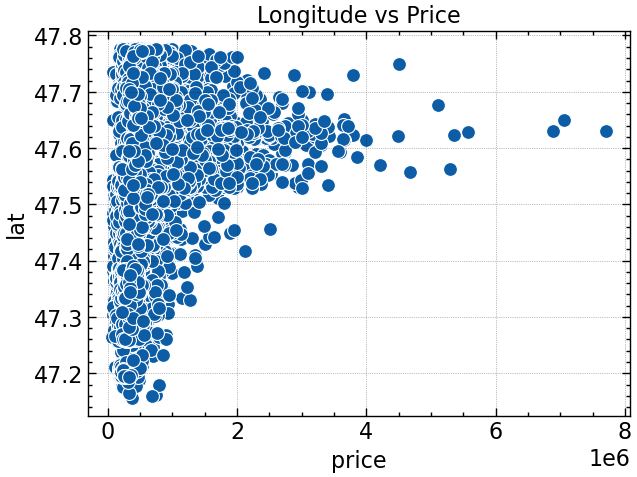

In [17]:
plt.figure(figsize=(7,5), dpi=100)
sns.scatterplot(x='price', y='lat', data=df, s=100);
plt.title('Longitude vs Price');

rumah yang mempunya harga tertingi berada di antara lat `47.6 - 47.7`

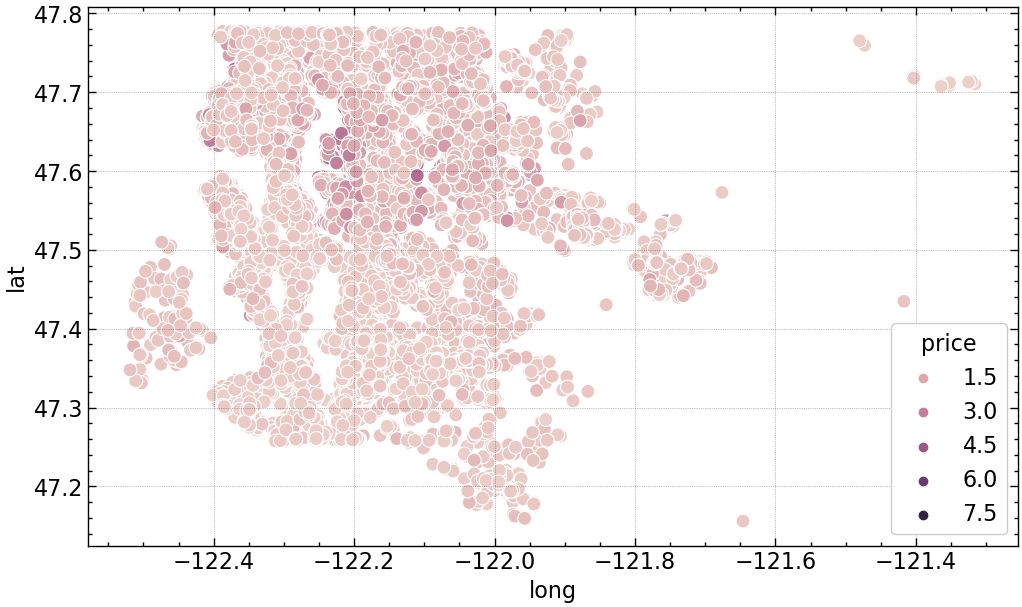

In [18]:
plt.figure(figsize=(12, 7), dpi=100)
sns.scatterplot(x='long', y='lat', hue='price', data=df, s=100);

In [19]:
df.sort_values('price', ascending=False).head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1315,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1164,1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8092,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2626,7738500731,20140815T000000,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8638,3835500195,20140618T000000,4489000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [20]:
df.loc[7252]

id                    6762700020
date             20141013T000000
price                  7700000.0
bedrooms                       6
bathrooms                    8.0
sqft_living                12050
sqft_lot                   27600
floors                       2.5
waterfront                     0
view                           3
condition                      4
grade                         13
sqft_above                  8570
sqft_basement               3480
yr_built                    1910
yr_renovated                1987
zipcode                    98102
lat                      47.6298
long                    -122.323
sqft_living15               3940
sqft_lot15                  8800
Name: 7252, dtype: object

Harga tertinggi rumah 7700000 dollars

In [21]:
# jumlah data rumah 1% dari outlier
len(df) * 0.10

2161.3

In [22]:
non_top_percent = df.sort_values('price', ascending=False).iloc[216:]

In [23]:
non_top_percent

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3281,8964800025,20150226T000000,1965000.0,5,3.75,3940,13738,1.5,0,3,...,9,3940,0,1951,0,98004,47.6203,-122.212,2370,13320
12577,2806300065,20150422T000000,1960000.0,4,4.00,4430,31353,2.0,0,0,...,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
12283,1923000260,20141015T000000,1959000.0,5,4.50,6200,23373,3.0,0,1,...,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
1152,4055701200,20150421T000000,1955000.0,4,2.75,3120,7898,1.0,1,4,...,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868
9175,3124059023,20150213T000000,1955000.0,3,1.75,3330,12566,1.0,1,4,...,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8274,3883800011,20141105T000000,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
16198,3028200080,20150324T000000,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
465,8658300340,20140523T000000,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
15293,40000362,20140506T000000,78000.0,2,1.00,780,16344,1.0,0,0,...,5,780,0,1942,0,98168,47.4739,-122.280,1700,10387


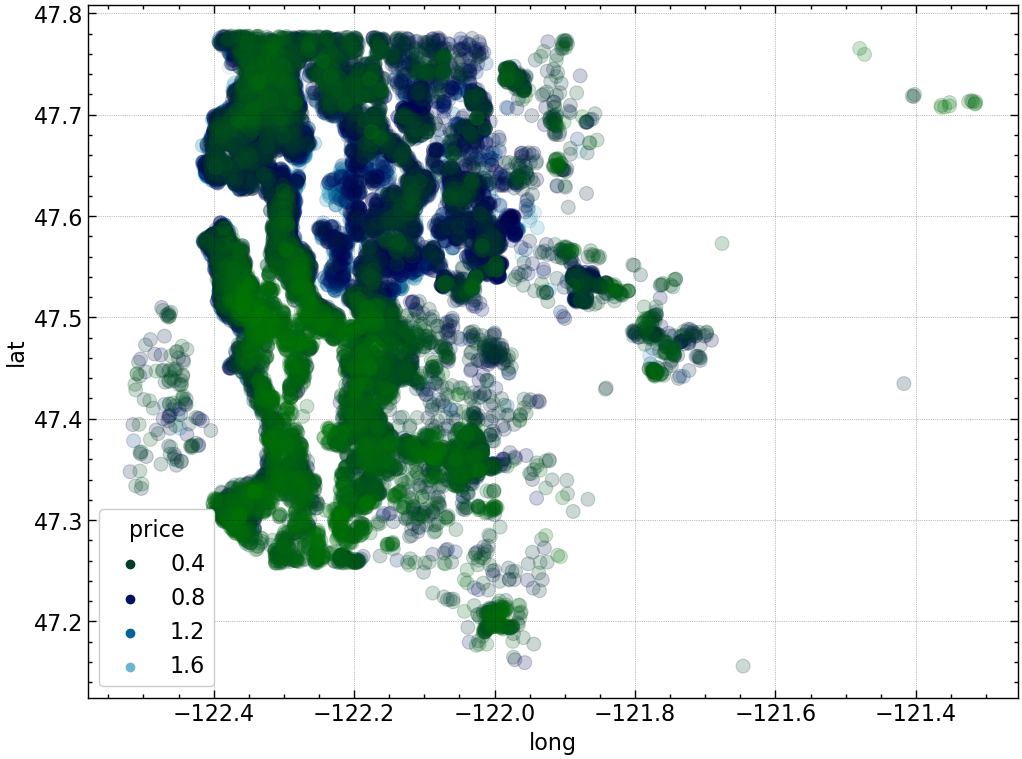

In [24]:
plt.figure(figsize=(12, 9), dpi=100)
sns.scatterplot(x='long', y='lat', hue='price', data =non_top_percent, palette='ocean', s=100, edgecolor=None, alpha=0.2);

Warna biru pada ploting merupakan area yan berada di kawasan tepi air (`waterfront`), wajar bila harganya mahal 

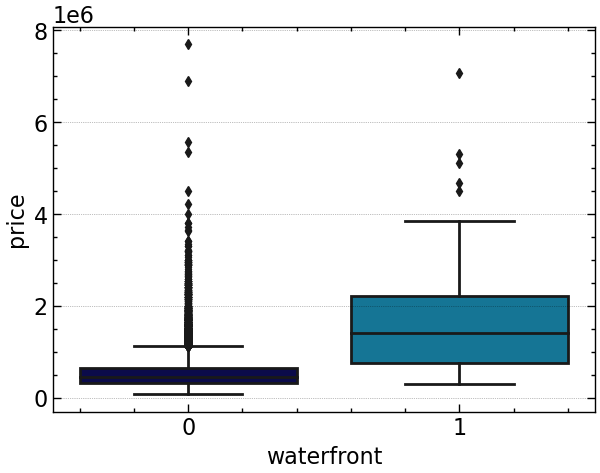

In [25]:
plt.figure(figsize=(7, 5), dpi =100)
sns.boxplot(x='waterfront', y='price', data=df, palette='ocean');

----------
## Feature engenering

In [26]:
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [27]:
# hapus kolom id
df = df.drop('id', axis =1)
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [28]:
# type kolom date 
df['date'].dtype

dtype('O')

In [29]:
# merubah type data pada kolom date
df['date'] = pd.to_datetime(df['date'])

In [30]:
df['date'].dtype

dtype('<M8[ns]')

In [31]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

## Mengekstrak kolom date

In [32]:
# year
df['year'] = df['date'].apply(lambda date: date.year)

In [33]:
# month
df['month'] = df['date'].apply(lambda date: date.month)

In [34]:
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12


In [35]:
df = df.drop('date', axis =1)

In [36]:
df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12


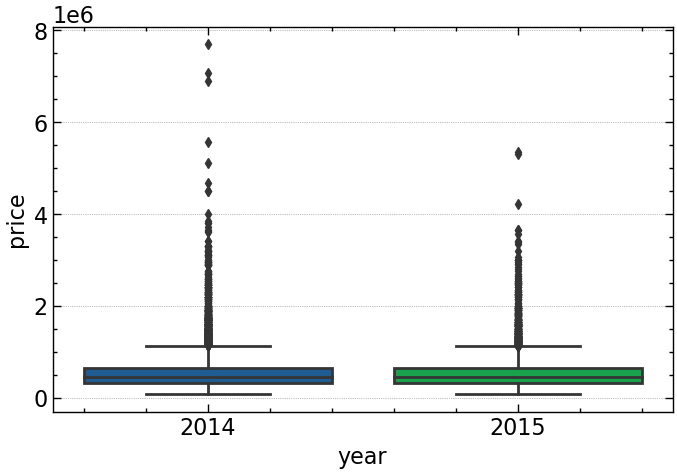

In [37]:
plt.figure(figsize=(8,5), dpi=100)
sns.boxplot(x='year', y='price', data=df);

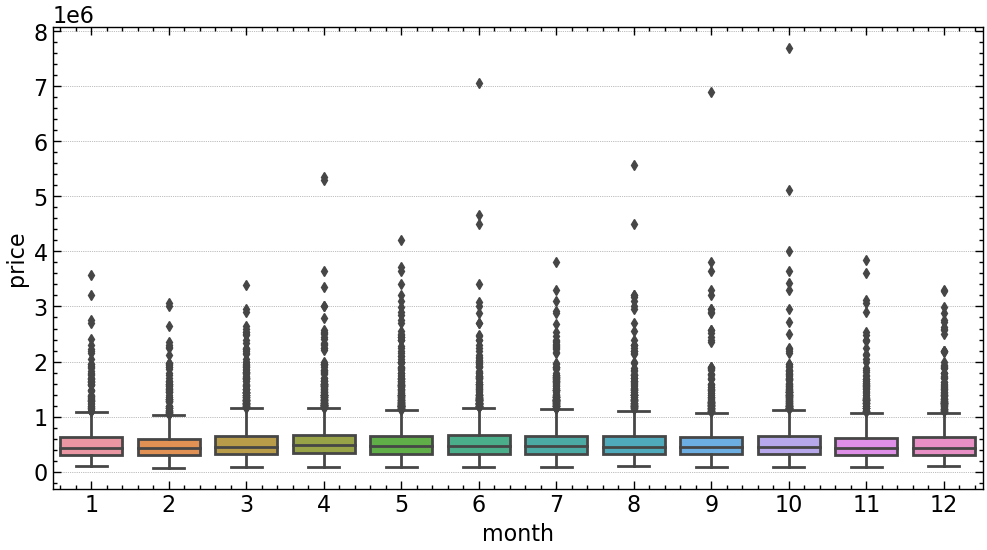

In [38]:
plt.figure(figsize=(12, 6), dpi=100)
sns.boxplot(x='month', y='price', data=df);

## Pegecekan harga rata-rata perbulan di setiap bulannya

In [39]:
df.groupby('month').mean()['price']

month
1     525870.889571
2     507851.371200
3     543977.187200
4     561837.774989
5     550768.785833
6     558002.199541
7     544788.764360
8     536445.276804
9     529253.821871
10    539026.971778
11    521961.009213
12    524461.866757
Name: price, dtype: float64

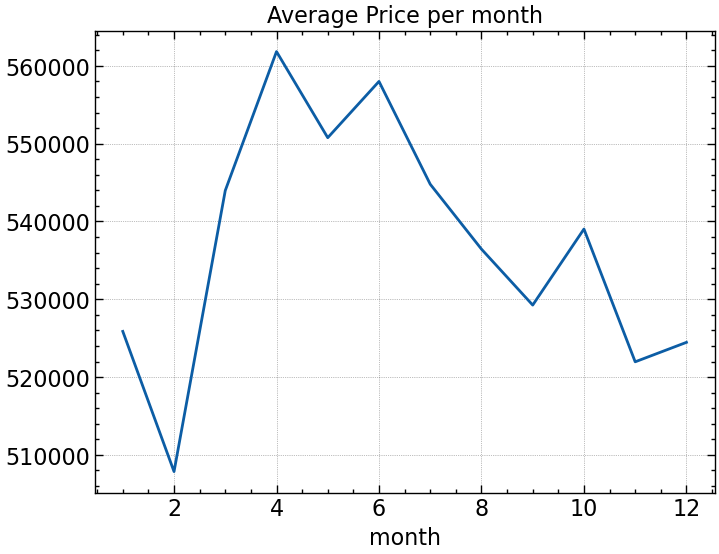

In [40]:
df.groupby('month').mean()['price'].plot();
plt.title('Average Price per month');

## Pegecekan harga rata-rata pertahun di setiap tahunnya

In [41]:
df.groupby('year').mean()['price']

year
2014    539181.428415
2015    541988.992264
Name: price, dtype: float64

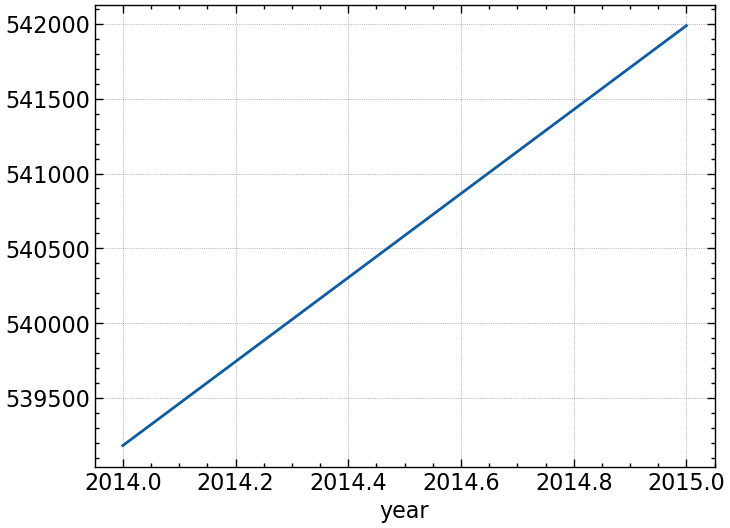

In [42]:
df.groupby('year').mean()['price'].plot();

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [44]:
df['zipcode']

0        98178
1        98125
2        98028
3        98136
4        98074
         ...  
21608    98103
21609    98146
21610    98144
21611    98027
21612    98144
Name: zipcode, Length: 21613, dtype: int64

In [45]:
df = df.drop('zipcode', axis =1)

In [46]:
df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2


In [47]:
df['yr_renovated'].value_counts()

0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [48]:
df['sqft_basement'].value_counts()

0      13126
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

-------------
## Train Test Split

In [49]:
X = df.drop('price', axis=1).values
y = df['price'].values

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=101)

In [52]:
X_train.shape

(15129, 19)

In [53]:
X_test.shape

(6484, 19)

In [54]:
y_train.shape

(15129,)

In [55]:
y_test.shape

(6484,)

------
## Scaler data

In [56]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
scaler = MinMaxScaler()

In [58]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
X_train.shape

(15129, 19)

In [60]:
X_test.shape

(6484, 19)

-----
## Create Model

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [62]:
X_train.shape

(15129, 19)

In [63]:
model = Sequential()

model.add(Dense(19, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

## Add EarlyStopping

In [64]:
from tensorflow.keras.callbacks import EarlyStopping

In [65]:
early_stop = EarlyStopping(monitor ='val_loss', patience=2)

## Fitting Model
batch size = 32, 64, 128, 256, 512

In [66]:
model.fit(X_train, y_train, 
          epochs= 200, 
          batch_size= 128, 
          validation_data =(X_test, y_test), 
          callbacks=[early_stop]
         )

Epoch 1/200
119/119 [==============================] - 4s 11ms/step - loss: 423619002368.0000 - val_loss: 432953524224.0000
Epoch 2/200
119/119 [==============================] - 1s 6ms/step - loss: 420984291328.0000 - val_loss: 422776307712.0000
Epoch 3/200
119/119 [==============================] - 1s 6ms/step - loss: 376927911936.0000 - val_loss: 319356239872.0000
Epoch 4/200
119/119 [==============================] - 1s 5ms/step - loss: 207638298624.0000 - val_loss: 123340316672.0000
Epoch 5/200
119/119 [==============================] - 1s 6ms/step - loss: 110521466880.0000 - val_loss: 104168235008.0000
Epoch 6/200
119/119 [==============================] - 1s 5ms/step - loss: 105861824512.0000 - val_loss: 102036635648.0000
Epoch 7/200
119/119 [==============================] - 1s 5ms/step - loss: 104084815872.0000 - val_loss: 99997876224.0000
Epoch 8/200
119/119 [==============================] - 1s 5ms/step - loss: 102257770496.0000 - val_loss: 97793302528.0000
Epoch 9/200
119/1

## Evaluation

In [67]:
losses = pd.DataFrame(model.history.history)

In [68]:
losses

,loss,val_loss
0,4.236190e+11,4.329535e+11
1,4.209843e+11,4.227763e+11
2,3.769279e+11,3.193562e+11
3,2.076383e+11,1.233403e+11
4,1.105215e+11,1.041682e+11
5,1.058618e+11,1.020366e+11
6,1.040848e+11,9.999788e+10
7,1.022578e+11,9.779330e+10
8,1.015812e+11,9.553248e+10
9,9.930880e+10,9.286213e+10


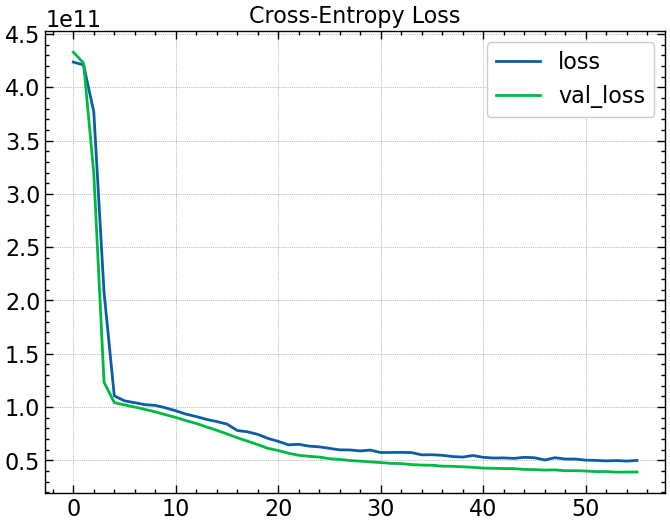

In [69]:
losses.plot();
plt.title('Cross-Entropy Loss');

## prediction

In [70]:
prediction  = model.predict(X_test)

203/203 [==============================] - 1s 3ms/step


In [71]:
prediction

array([[464636.66],
       [605627.94],
       [490840.6 ],
       ...,
       [511425.84],
       [170413.58],
       [852837.75]], dtype=float32)

## Evaluation on test data

In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [73]:
MAE = mean_absolute_error(y_test,prediction )
print(f'MAE : {MAE}')

MAE : 117361.2214697356


In [74]:
MSE = mean_squared_error(y_test, prediction)
print(f'MSE : {MSE}')

MSE : 39163343517.827095


In [75]:
RMSE = np.sqrt(MSE)
print(f'RMSE : {RMSE}')

RMSE : 197897.30548399867


## Compire final evaluation MSE

In [76]:
training_score = model.evaluate(X_train, y_train, verbose=0)

In [77]:
test_score = model.evaluate(X_test, y_test, verbose = 0)

In [78]:
training_score, test_score # diharapkan angkanya mendekati

(39199727616.0, 39163338752.0)

---------
## Cek rata-rata price 

In [79]:
df['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [80]:
mean_price = df['price'].mean()
mean_price

540088.1417665294

In [81]:
(100 * MAE)/mean_price

21.730012639394104

----------
## Explaned variance score

In [82]:
explained_variance_score(y_test, prediction)

0.7238197705374687

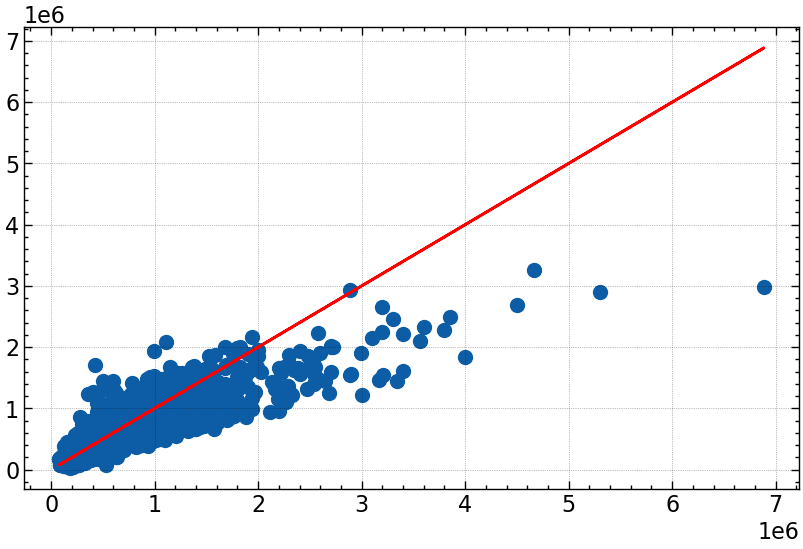

In [83]:
plt.figure(figsize=(10,6),dpi=100)

plt.scatter(y_test, prediction, s=100)

plt.plot(y_test, y_test, 'r');

## Plot Error

In [84]:
prediction.shape

(6484, 1)

In [85]:
error = y_test.reshape(6484, 1) - prediction

In [86]:
error

array([[-114686.65625 ],
       [-155627.9375  ],
       [ 144159.40625 ],
       ...,
       [-117175.84375 ],
       [  79086.421875],
       [ 497162.25    ]])

C:\Users\ibrahim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


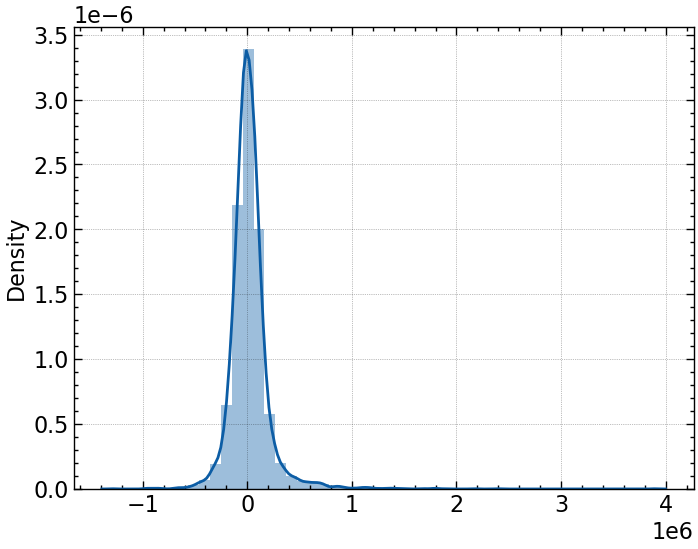

In [87]:
sns.distplot(error);

## Prediction new House

In [88]:
single_house = df.drop('price', axis =1).iloc[0]

In [89]:
single_house

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
year             2014.0000
month              10.0000
Name: 0, dtype: float64

In [90]:
single_house.shape

(19,)

In [91]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

In [92]:
single_house

array([[0.27272727, 0.125     , 0.06716981, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.5       , 0.09758772,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00573322, 0.        , 0.81818182]])

In [93]:
model.predict(single_house)

1/1 [==============================] - 0s 57ms/step


array([[252686.81]], dtype=float32)

In [94]:
df.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
year               2014.0000
month                10.0000
Name: 0, dtype: float64

**Kesimpulan :**  dari model yan telah kita buat dapat di katakan baik karena hasil prediksi rumah `252686.81` mendekati harga sebenarnya `221900.0` nyaris sempurna 